<a href="https://colab.research.google.com/github/DeVcB13d/OpenCV_Tut/blob/main/Spatial_Operations_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png 

--2022-07-02 01:30:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg’

cameraman.jpeg      100%[===================>]   7.07K  --.-KB/s    in 0s      

2022-07-02 01:30:39 (600 MB/s) - ‘cameraman.jpeg’ saved [7243/7243]

--2022-07-02 01:30:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image_1, cv.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(image_2, cv.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


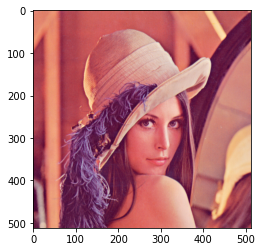

In [4]:
image = cv.imread("lenna.png")
print(image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))

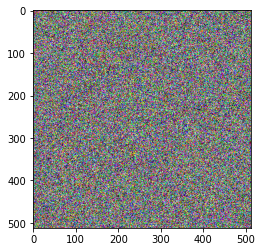

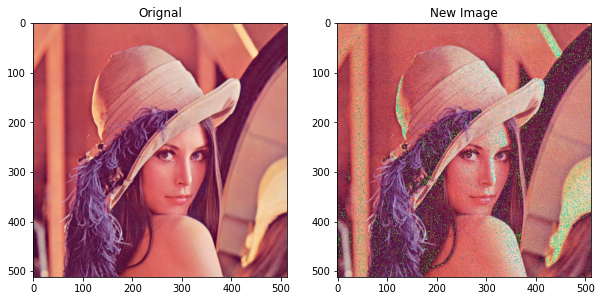

In [5]:
#creating a noisy image
rows,cols,_ = image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
plt.imshow(noise)
plt.show()
noisy_image = image + noise
plot_image(image,noisy_image)

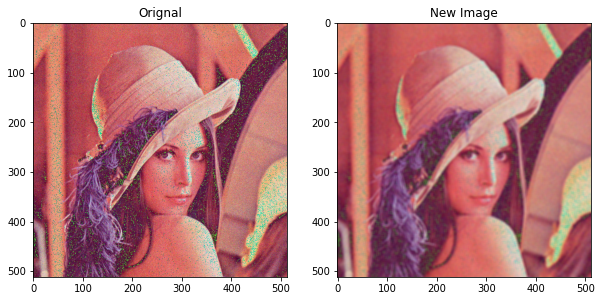

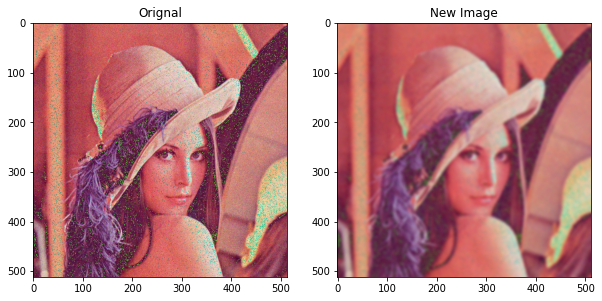

In [6]:
#Filtering the noise
kernel = np.ones((6,6))/36
image_filtered = cv.filter2D(src = noisy_image,ddepth=-1,kernel=kernel)
plot_image(noisy_image,image_filtered)
image_filtered = cv.filter2D(src = image_filtered,ddepth=-1,kernel=kernel)
plot_image(noisy_image,image_filtered)

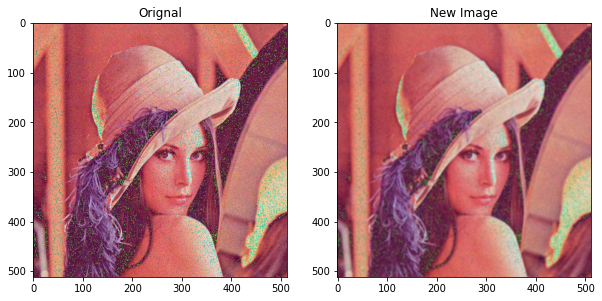

In [7]:
kernel = np.ones((4,4))/16
image_filtered = cv.filter2D(src = noisy_image,ddepth=-1,kernel=kernel)
plot_image(noisy_image,image_filtered)
kernel = np.ones((8,8))/64
image_filtered = cv.filter2D(src = noisy_image,ddepth=-1,kernel=kernel)
#plot_image(noisy_image,image_filtered)

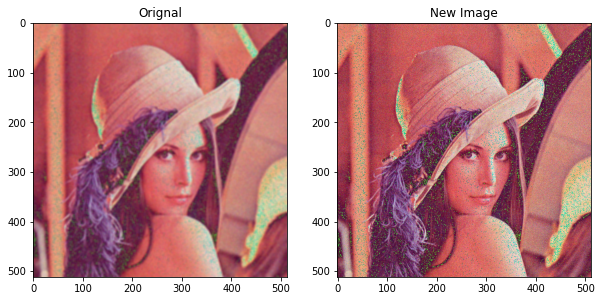

In [8]:
image_filtered = cv.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered,noisy_image)

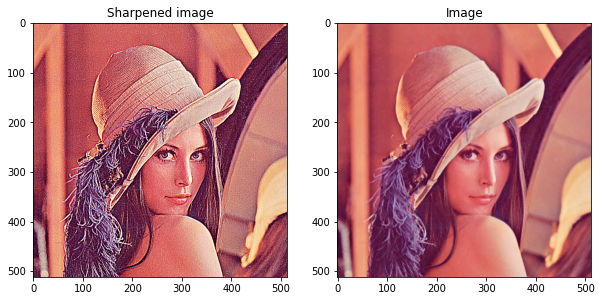

In [9]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

In [20]:
img_gray = cv.imread('barbara.png', cv.IMREAD_GRAYSCALE)
img_gray = cv.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)

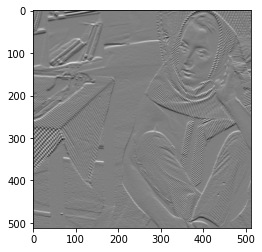

In [21]:
ddepth = cv.CV_16S

grad_x = cv.Sobel(src=img_gray,ddepth=ddepth,dx=0,dy=1,ksize=3)

plt.imshow(grad_x,cmap='gray')

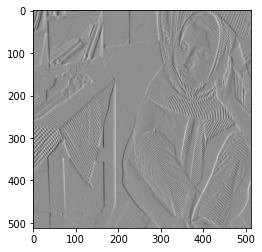

In [22]:
grad_y = cv.Sobel(src=img_gray,ddepth=ddepth,dx=1,dy=0,ksize=3)

plt.imshow(grad_y,cmap='gray')

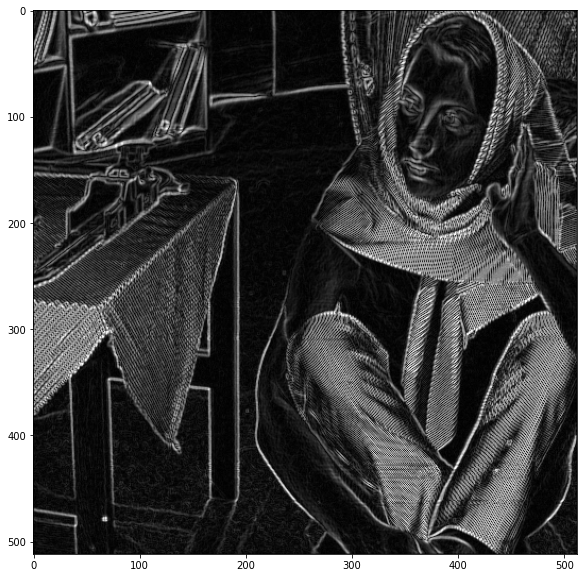

In [23]:
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')